### Problem Statement:

#### Refer Titanic dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a decision tree. Analyse the performance of the model with suitable evaluation measures.

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Load titanic dataset

In [3]:
df_gender_baseline = pd.read_csv('gender_baseline.csv')
df_gender_baseline

,passenger_id,survived
0,295,0
1,1150,0
2,89,0
3,1063,0
4,1020,0
...,...,...
454,1194,0
455,403,0
456,108,1
457,510,0


In [4]:
df_test=pd.read_csv(r"titanic_test.csv")
df_test

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1194,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN,NaN,NaN
455,403,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S,NaN,NaN,"England / Detroit, MI"
456,108,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,4,NaN,NaN
457,510,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,NaN,NaN,"Halesworth, England"


In [5]:
df_train=pd.read_csv(r"titanic_train.csv")
df_train

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [6]:
df_test=df_test.merge(df_gender_baseline,on='passenger_id',how='left')
df_test

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA",0
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN,0
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ",0
3,1063,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON",0
4,1020,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1194,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S,NaN,NaN,NaN,0
455,403,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S,NaN,NaN,"England / Detroit, MI",0
456,108,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,4,NaN,NaN,1
457,510,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,NaN,NaN,"Halesworth, England",0


### Data Description

`pclass`: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)

`name`: Name of the passenger

`sex`: Gender of the passenger (Male/Female)

`age`: Passenger's age

`sibsp`: Number of siblings/spouses aboard

`parch`: Number of parents/children aboard

`ticket`: Ticket number

`fare`: Passenger fare (British Pound)

`cabin`: Cabin Number

`embarked`: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) 

`boat`:  Lifeboat, many missing values

`body`: Body Identification Number

`home.dest`: Home/destination

### Droping of Unwanted Columns from data

In [7]:
df_train=df_train.drop(['passenger_id','name','ticket','cabin','boat','body','home.dest','embarked'],axis=1)

In [8]:
df_test=df_test.drop(['passenger_id','name','ticket','cabin','boat','body','home.dest','embarked'],axis=1)

In [9]:
df_train

,pclass,sex,age,sibsp,parch,fare,survived
0,3,female,NaN,0,0,7.7333,1
1,3,male,38.0,0,0,8.6625,0
2,3,female,30.0,1,1,24.1500,0
3,2,female,54.0,1,3,23.0000,1
4,2,male,40.0,0,0,13.0000,0
...,...,...,...,...,...,...,...
845,1,male,55.0,0,0,50.0000,0
846,1,male,58.0,0,0,29.7000,0
847,2,female,24.0,1,0,26.0000,1
848,3,female,3.0,1,1,13.7750,0


In [10]:
df_test

,pclass,sex,age,sibsp,parch,fare,survived
0,1,male,17.0,0,2,110.8833,0
1,3,male,NaN,0,0,14.5000,0
2,1,male,31.0,1,0,52.0000,0
3,3,male,41.0,0,0,7.1250,0
4,3,male,21.0,0,0,7.8958,0
...,...,...,...,...,...,...,...
454,3,male,NaN,0,0,7.8958,0
455,2,male,23.0,0,0,13.0000,0
456,1,female,NaN,0,0,110.8833,1
457,2,male,16.0,0,0,10.5000,0


### Checking Null Values

In [11]:
print(df_train.isnull().sum ())

pclass        0
sex           0
age         174
sibsp         0
parch         0
fare          1
survived      0
dtype: int64


We got 174 null values in `age` column and 1 null value in `fare` column.

In [12]:
print(df_test.isnull().sum ())

pclass       0
sex          0
age         89
sibsp        0
parch        0
fare         0
survived     0
dtype: int64


We got 89 null values in `age` column.

### Replacing Null Values

In [14]:
df_train['age']=df_train['age'].fillna(df_train['age'].mean())
df_train['fare']=df_train['fare'].fillna(df_train['fare'].mean())

In [15]:
df_test['age']=df_test['age'].fillna(df_test['age'].mean())

In [16]:
df_train.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
survived    0
dtype: int64

In [17]:
df_test.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
survived    0
dtype: int64

### Encoding For sex column


In [18]:
df_train.replace({'male':0,'female':1},inplace=True)
df_test.replace({'male':0,'female':1},inplace=True)

In [19]:
df_train

,pclass,sex,age,sibsp,parch,fare,survived
0,3,1,29.519847,0,0,7.7333,1
1,3,0,38.000000,0,0,8.6625,0
2,3,1,30.000000,1,1,24.1500,0
3,2,1,54.000000,1,3,23.0000,1
4,2,0,40.000000,0,0,13.0000,0
...,...,...,...,...,...,...,...
845,1,0,55.000000,0,0,50.0000,0
846,1,0,58.000000,0,0,29.7000,0
847,2,1,24.000000,1,0,26.0000,1
848,3,1,3.000000,1,1,13.7750,0


In [20]:
df_test

,pclass,sex,age,sibsp,parch,fare,survived
0,1,0,17.000000,0,2,110.8833,0
1,3,0,30.541216,0,0,14.5000,0
2,1,0,31.000000,1,0,52.0000,0
3,3,0,41.000000,0,0,7.1250,0
4,3,0,21.000000,0,0,7.8958,0
...,...,...,...,...,...,...,...
454,3,0,30.541216,0,0,7.8958,0
455,2,0,23.000000,0,0,13.0000,0
456,1,1,30.541216,0,0,110.8833,1
457,2,0,16.000000,0,0,10.5000,0


### Exploratory Data Analytics

#### Count plot of Survived (Train data)

0    537
1    313
Name: survived, dtype: int64


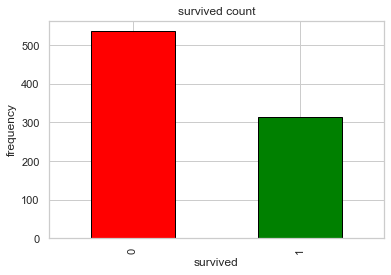

In [22]:
x=df_train.survived.value_counts()
print(x)
x.plot(kind='bar',color=('red','green'),edgecolor='black')
plt.title('survived count')
plt.xlabel('survived')
plt.ylabel('frequency')
plt.show()

There is 850 Passanger totally out of which 313 Passanger are survived and 537 are not survived

#### Count plot of Survived (Test data)

0    292
1    167
Name: survived, dtype: int64


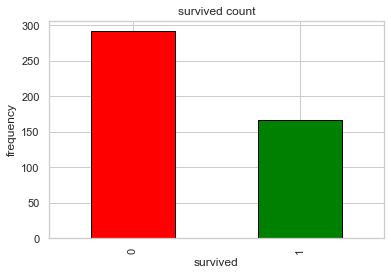

In [23]:
x=df_test.survived.value_counts()
print(x)
x.plot(kind='bar',color=('red','green'),edgecolor='black')
plt.title('survived count')
plt.xlabel('survived')
plt.ylabel('frequency')
plt.show()

There are 459 passengers out of which 167 passengers survived and 292 are did not survived.

#### Pie Chart of Sex vs Survived (Train) 

##### Male

0    448
1    103
Name: survived, dtype: int64


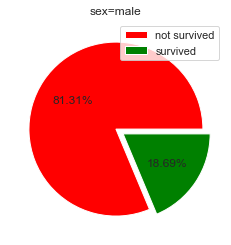

In [24]:
sex_male=df_train[df_train['sex']==0]['survived'].value_counts()
print(sex_male)
label=['not survived','survived']
myexplode=[0,0.1]
plt.pie(sex_male,autopct='%1.2f%%',colors=('red','green'),explode=myexplode)
plt.title('sex=male')
plt.legend(label,loc=1)
plt.show()

From the above graph it is clear that survived rate of male passanger is very less.out of 551 only 103 passengers are survived.

##### Female

1    210
0     89
Name: survived, dtype: int64


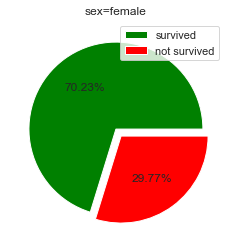

In [25]:
sex_female=df_train[df_train['sex']==1]['survived'].value_counts()
print(sex_female)
label=['survived','not survived']
plt.pie(sex_female,autopct='%1.2f%%',colors=('green','red'),explode=myexplode)
plt.title('sex=female')
plt.legend(label,loc=1)
plt.show()

From above figure It is clear that The survival rate of female is much better than male . out of 299 female passenger ,
210 female passenger are survived.

#### Pie chart of Sex vs Survived (Test)

##### Male

0    292
Name: survived, dtype: int64


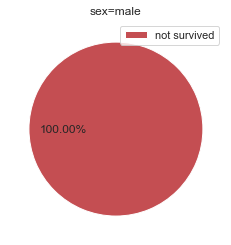

In [26]:
sex_male=df_test[df_test['sex']==0]['survived'].value_counts()
print(sex_male)
label=['not survived','survived']
myexplode=[0,0.1]
plt.pie(sex_male,autopct='%1.2f%%',colors=('red'))
plt.title('sex=male')
plt.legend(label,loc=1)
plt.show()

For test data,from above we can clearly observed that not a single passenger is survived out of 292 male passengers.

##### Female

0    292
Name: survived, dtype: int64


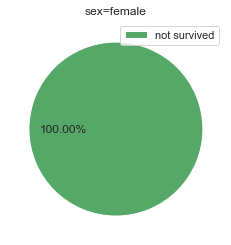

In [27]:
sex_female=df_test[df_test['sex']==0]['survived'].value_counts()
print(sex_female)
label=['not survived','survived']
myexplode=[0,0.1]
plt.pie(sex_female,autopct='%1.2f%%',colors=('green'))
plt.title('sex=female')
plt.legend(label,loc=1)
plt.show()

#### Barplot of Survived vs Pclass(Train and Test)

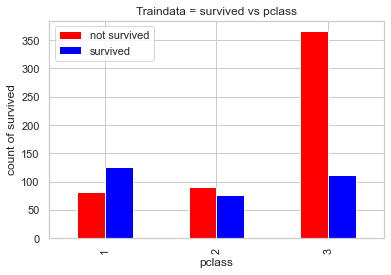

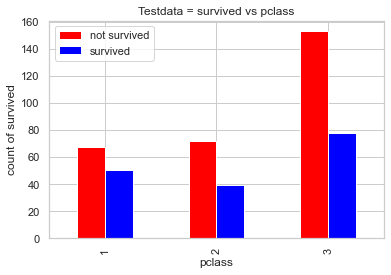

In [28]:
#For Train Data
pd.crosstab(df_train.pclass,df_train.survived).plot(kind='bar',color=('red','blue','green'))
plt.title('Traindata = survived vs pclass')
plt.xlabel('pclass')
plt.ylabel('count of survived')
label=['not survived','survived']
plt.legend(label,loc=2)
plt.show()

#For Test data
pd.crosstab(df_test.pclass,df_test.survived).plot(kind='bar',color=('red','blue','green'))
plt.title('Testdata = survived vs pclass')
plt.xlabel('pclass')
plt.ylabel('count of survived')
label=['not survived','survived']
plt.legend(label,loc=2)
plt.show()

From above figures we can observed that there are geater number of passengers in Class3 than class1 or class2 but the survival 
rate is lesser than other two classes.

### Barplot of Survived vs Sibsp(Train and Test)

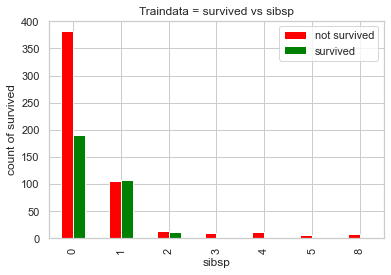

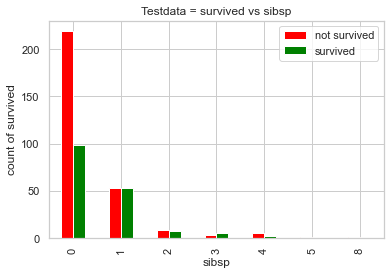

In [29]:
# For Train Data
label=['not survived','survived']
pd.crosstab(df_train.sibsp,df_train.survived).plot(kind='bar',color=('red','green'))
plt.title('Traindata = survived vs sibsp')
plt.xlabel('sibsp')
plt.ylabel('count of survived')
plt.legend(label,loc=1)
plt.show()

#For Test Data
label=['not survived','survived']
pd.crosstab(df_test.sibsp,df_test.survived).plot(kind='bar',color=('red','green'))
plt.title('Testdata = survived vs sibsp')
plt.xlabel('sibsp')
plt.ylabel('count of survived')
plt.legend(label,loc=1)
plt.show()

As the Number of sibling increased the survival rate goes down.most of the pasangers are with no siblings.

#### Barplot of survived vs parch(Train and Test)

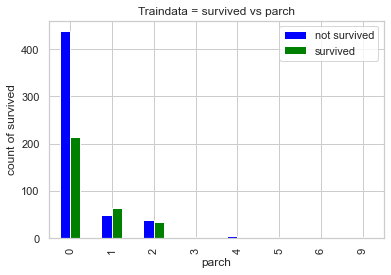

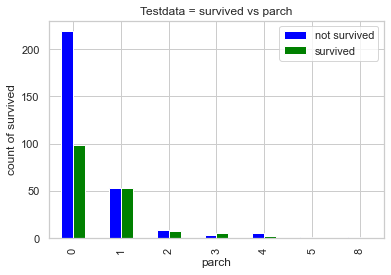

In [30]:
# For Train Data
label=['not survived','survived']
pd.crosstab(df_train.parch,df_train.survived).plot(kind='bar',color=('blue','green'))
plt.title('Traindata = survived vs parch')
plt.xlabel('parch')
plt.ylabel('count of survived')
plt.legend(label,loc=1)
plt.show()

# For Test Data
label=['not survived','survived']
pd.crosstab(df_test.sibsp,df_test.survived).plot(kind='bar',color=('blue','green'))
plt.title('Testdata = survived vs parch')
plt.xlabel('parch')
plt.ylabel('count of survived')
plt.legend(label,loc=1)
plt.show()

Most of the passenger are with no parents.
The survival rate of passenger with one parent is more than other, as the number of parents increased survival rate goes down

#### Histogram of Age(Train and Test)

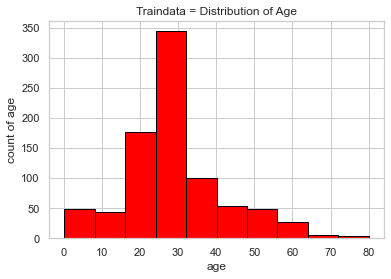

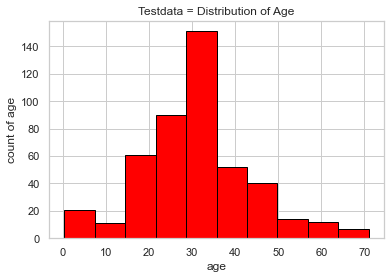

In [31]:
#For Train Data
df_train['age'].plot(kind='hist',color='red',edgecolor='black')
plt.title('Traindata = Distribution of Age')
plt.xlabel('age')
plt.ylabel('count of age')
plt.show()

# For Test Data
df_test['age'].plot(kind='hist',color='red',edgecolor='black')
plt.title('Testdata = Distribution of Age')
plt.xlabel('age')
plt.ylabel('count of age')
plt.show()

#### Histogram of Fare(Train and Test)

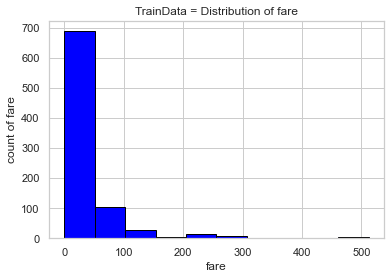

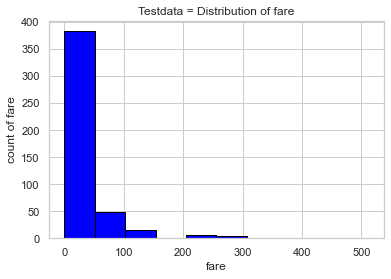

In [32]:
#For Train Data
df_train['fare'].plot(kind='hist',color='blue',edgecolor='black')
plt.title('TrainData = Distribution of fare')
plt.xlabel('fare')
plt.ylabel('count of fare')
plt.show()

#For Test Data
df_test['fare'].plot(kind='hist',color='blue',edgecolor='black')
plt.title('Testdata = Distribution of fare')
plt.xlabel('fare')
plt.ylabel('count of fare')
plt.show()

The distribution of 'fare 'column is Right skewed

In [33]:
df_train.corr()['survived']

pclass     -0.329360
sex         0.510274
age        -0.038553
sibsp      -0.044980
parch       0.059172
fare        0.251162
survived    1.000000
Name: survived, dtype: float64

<AxesSubplot:>

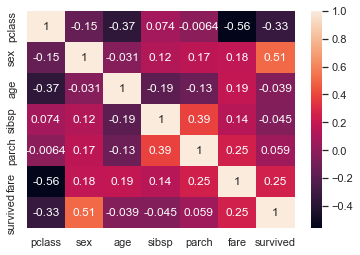

In [34]:
sns.heatmap(df_train.corr(),annot = True)

In [35]:
df_test.corr()['survived']

pclass     -0.073129
sex         1.000000
age        -0.109149
sibsp       0.080728
parch       0.296134
fare        0.192194
survived    1.000000
Name: survived, dtype: float64

<AxesSubplot:>

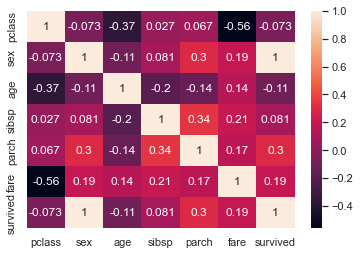

In [36]:
sns.heatmap(df_test.corr(),annot = True)

From heatmap we can say that columns Sex, Parch and Fare highly correlated

### Fitting the Model

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth = 9)
print(model)

DecisionTreeClassifier(max_depth=9)


In [39]:
x_train=df_train.drop(['survived'],axis=1)
y_train=df_train['survived']
x_test=df_test.drop(['survived'],axis=1)
y_test=df_test['survived']

In [40]:
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy :',accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

Accuracy : 0.803921568627451
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       292
           1       0.79      0.62      0.70       167

    accuracy                           0.80       459
   macro avg       0.80      0.77      0.78       459
weighted avg       0.80      0.80      0.80       459

[[265  27]
 [ 63 104]]


In [41]:
x1_train=df_train.drop(['survived','age','fare'],axis=1)
y1_train=df_train['survived']
x1_test=df_test.drop(['survived','age','fare'],axis=1)
y1_test=df_test['survived']

In [42]:
model.fit(x1_train,y1_train)
prediction=model.predict(x1_test)
print('Accuracy :',accuracy_score(y1_test,prediction))
print(classification_report(y1_test,prediction))
print(confusion_matrix(y1_test,prediction))

Accuracy : 0.9019607843137255
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       292
           1       0.92      0.80      0.86       167

    accuracy                           0.90       459
   macro avg       0.91      0.88      0.89       459
weighted avg       0.90      0.90      0.90       459

[[280  12]
 [ 33 134]]


### Decision Tree

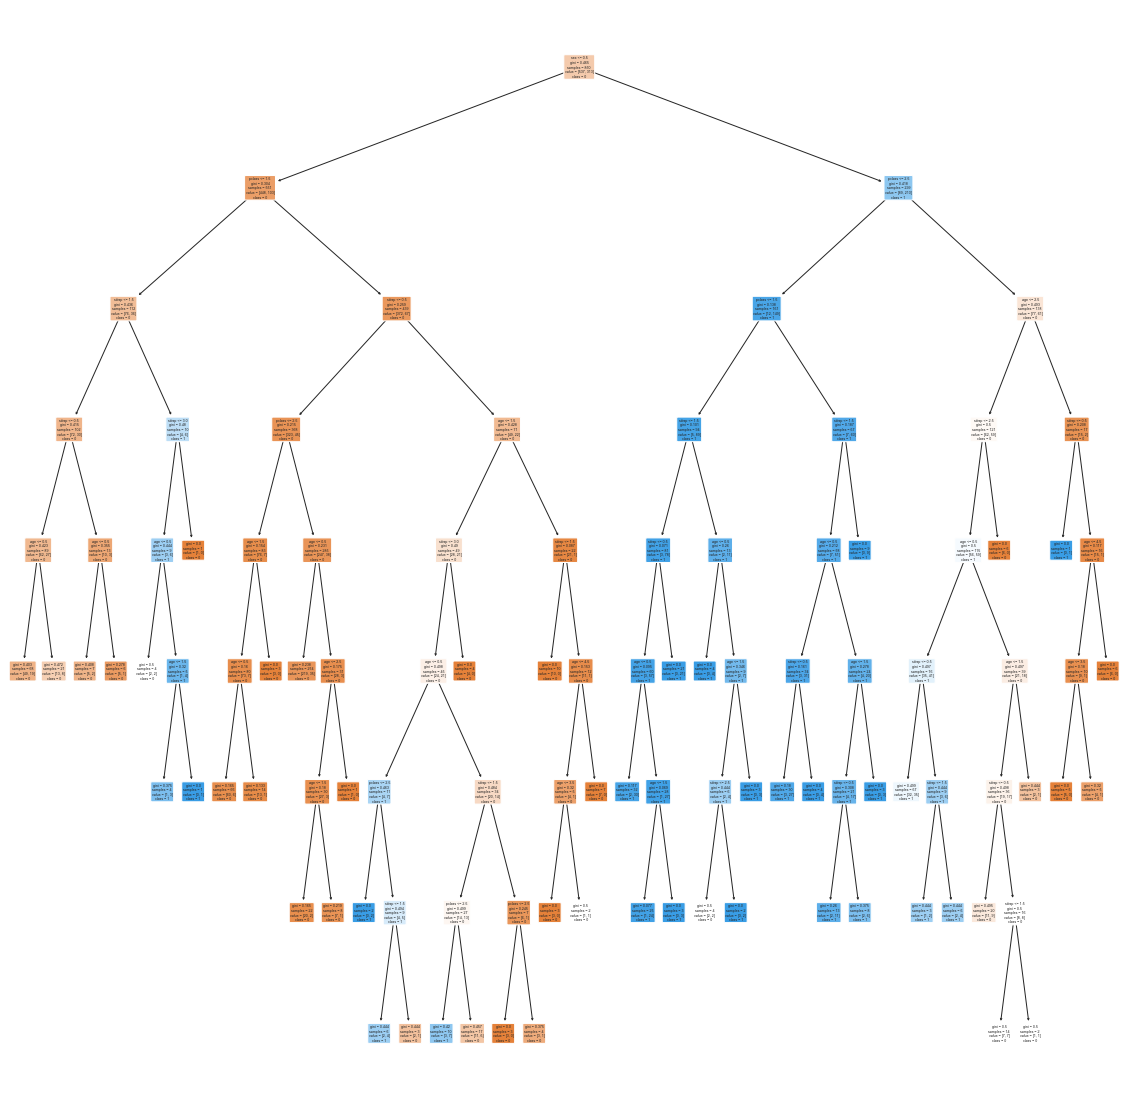

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(
      model,
      filled=True,
       rounded=True,
       feature_names=x_train.columns,
       class_names=['0','1']
)
plt.savefig('tree.png',dpi=900,bbox_inches='tight')
plt.show()